In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import copy
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [381]:
data_folder = Path("/Users/dorothyli/Desktop/Titanic/")

genderFile = data_folder / 'gender_submission.csv'
trainFile = data_folder / 'train.csv'
testFile = data_folder / 'test.csv'

gender = pd.read_csv(genderFile)
test = pd.read_csv(testFile)
train = pd.read_csv(trainFile)

In [382]:
print(gender.head())
gender.shape

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


(418, 2)

In [383]:
print(train.head())
train.shape

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


(891, 12)

In [384]:
print(test.head())
test.shape

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


(418, 11)

In [34]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [385]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [36]:
for col in ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']:
    print(col, train[col].unique())

Pclass [3 2 1]
Sex ['male' 'female']
Age [34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54.   64.   37.   34.
 11.5   8.    0.33 38.   57.   40.5   0.92 19.   36.5   0.75  0.83 58.
  0.17 59.   14.5  44.    5.   51.    3.   38.5 ]
SibSp [0 1 2 3 4 5 8]
Parch [0 1 3 2 4 6 5 9]
Fare [  7.8292   7.       9.6875   8.6625  12.2875   9.225    7.6292  29.
   7.2292  24.15     7.8958  26.      82.2667  61.175   27.7208  12.35
   7.225    7.925   59.4      3.1708  31.6833  61.3792 262.375   14.5
  61.9792  30.5     21.6792  31.5     20.575   23.45    57.75     8.05
   9.5     56.4958  13.4167  26.55     7.85    13.      52.5542  29.7
   7.75    76.2917  15.9     60.      15.0333  23.     263.      15.5792
  29.125

Data Variables Explained
Embarked - C = Cherbourg, Q = Queenstown, S = Southampton
Survival - 0 = No, 1 = Yes
Class - 1 = 1st, 2 = 2nd, 3 = 3rd

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [43]:
#lots of na in cabin, some in age 
for col in train:
    print(col, round(sum(train[col].isnull())/train.shape[0],2))

PassengerId 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 0.21
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 0.78
Embarked 0.0


In [386]:
#no NA in gender
for col in gender:
    print(col, round(sum(gender[col].isnull())))

PassengerId 0
Survived 0


In [387]:
#Find repeats - None! 
duplicates = train.duplicated(subset = train.columns, keep = False)
sum(duplicates)

duplicates = test.duplicated(subset = test.columns, keep = False)
sum(duplicates)

0

In [795]:
#Create copies
trainCopy = copy.deepcopy(train)
genderCopy = copy.deepcopy(gender)
testCopy = copy.deepcopy(test)

In [810]:
#Merge train and test for exploratory data analysis
#trainComplete = pd.merge(trainCopy, genderCopy, on = 'PassengerId')
trainCopy['train/test']='train'
testCopy['train/test']='test'
#testCopy['Survived'] = -1

joined=pd.concat([trainCopy,testCopy],sort=False)
joined.reset_index(inplace=True)
joined.drop('index',axis=1,inplace=True)
joined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [798]:
joined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test,cabinLetter,cabinNumber
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,,
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,C,85
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,,
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,C,123
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,,


In [815]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(joined.Sex.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = onehotencoder.get_feature_names(['Sex']) ) 
joined = pd.concat([joined, dfOneHot], axis=1)
#droping the country column 
joined.drop(['Sex'], axis=1) 
joined.drop(['Sex_male'], axis=1, inplace = True)

In [823]:
#VIF - variance inflation factor - multicollinearity - dummy variable trap
#NEED TO DO THIS AFTER ALL DATA IS NUMERICAL 
import statsmodels.api as sm
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y.astype(float),x.astype(float)).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

#X=df.drop(['Salary'],axis=1)
#calculate_vif(X)


#VIF=1, Very Less Multicollinearity
#VIF<5, Moderate Multicollinearity
#VIF>5, Extreme Multicollinearity (This is what we have to avoid)


# Exploratory Data Analysis

In [399]:
#Cast columns to string - objects can reference strings, arrays
joined[['Name', 'Sex', 'Cabin', 'train/test']] = joined[['Name', 'Sex', 'Cabin', 'train/test']].astype(str)
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
 12  cabinLetter  891 non-null    object 
 13  cabinNumber  891 non-null    object 
 14  train/test   1309 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [307]:
joined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,-0.564553
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.691691
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,-1.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,-1.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,-1.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [400]:
joined.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [401]:
joined.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [402]:
groupby_df =joined[joined['train/test']=='train'].groupby(['Pclass', 'Survived']).agg({'Survived': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x: print(str(round(100 * x / x.sum(),2)) + '%'))
groupby_df,groupby_pcts

                 Survived
Pclass Survived          
1      0.0          37.04
       1.0          62.96%
                 Survived
Pclass Survived          
2      0.0          52.72
       1.0          47.28%
                 Survived
Pclass Survived          
3      0.0          75.76
       1.0          24.24%


(                 Survived
 Pclass Survived          
 1      0.0             80
        1.0            136
 2      0.0             97
        1.0             87
 3      0.0            372
        1.0            119,
 Empty DataFrame
 Columns: []
 Index: [])

In [403]:
groupby_df = joined[joined['train/test']=='train'].groupby(['SibSp', 'Survived']).agg({'Survived': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:print(str(round(100 * x / x.sum(),2)) + '%'))
groupby_df,groupby_pcts
#members with 1,2 siblings have higher chance of survival

                Survived
SibSp Survived          
0     0.0          65.46
      1.0          34.54%
                Survived
SibSp Survived          
1     0.0          46.41
      1.0          53.59%
                Survived
SibSp Survived          
2     0.0          53.57
      1.0          46.43%
                Survived
SibSp Survived          
3     0.0           75.0
      1.0           25.0%
                Survived
SibSp Survived          
4     0.0          83.33
      1.0          16.67%
                Survived
SibSp Survived          
5     0.0          100.0%
                Survived
SibSp Survived          
8     0.0          100.0%


(                Survived
 SibSp Survived          
 0     0.0            398
       1.0            210
 1     0.0             97
       1.0            112
 2     0.0             15
       1.0             13
 3     0.0             12
       1.0              4
 4     0.0             15
       1.0              3
 5     0.0              5
 8     0.0              7,
 Empty DataFrame
 Columns: []
 Index: [])

In [406]:
groupby_df = joined[joined['train/test']=='train'].groupby(['Sex', 'Survived']).agg({'Survived': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:print(str(round(100 * x / x.sum(),2)) + '%'))
groupby_df,groupby_pcts

                 Survived
Sex    Survived          
female 0.0           25.8
       1.0           74.2%
               Survived
Sex  Survived          
male 0.0          81.11
     1.0          18.89%


(                 Survived
 Sex    Survived          
 female 0.0             81
        1.0            233
 male   0.0            468
        1.0            109,
 Empty DataFrame
 Columns: []
 Index: [])

In [409]:
groupby_df = joined[joined['train/test']=='train'].groupby(['Embarked', 'Survived']).agg({'Survived': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:print(str(round(100 * x / x.sum(),2)) + '%'))
groupby_df,groupby_pcts
#embarked at c has higher survival

                   Survived
Embarked Survived          
C        0.0          44.64
         1.0          55.36%
                   Survived
Embarked Survived          
Q        0.0          61.04
         1.0          38.96%
                   Survived
Embarked Survived          
S        0.0           66.3
         1.0           33.7%


(                   Survived
 Embarked Survived          
 C        0.0             75
          1.0             93
 Q        0.0             47
          1.0             30
 S        0.0            427
          1.0            217,
 Empty DataFrame
 Columns: []
 Index: [])

In [ ]:
Graphs

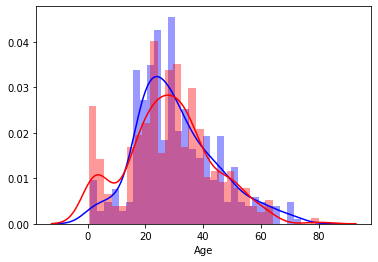

In [414]:
sns.distplot(joined[joined['Survived']==0]['Age'],bins=30,color='blue')
sns.distplot(joined[joined['Survived']==1]['Age'],bins=30,color='red')

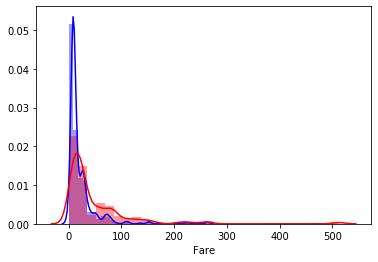

In [416]:
sns.distplot(joined[joined['Survived']==0]['Fare'],bins=30,color='blue')
sns.distplot(joined[joined['Survived']==1]['Fare'],bins=30,color='red')

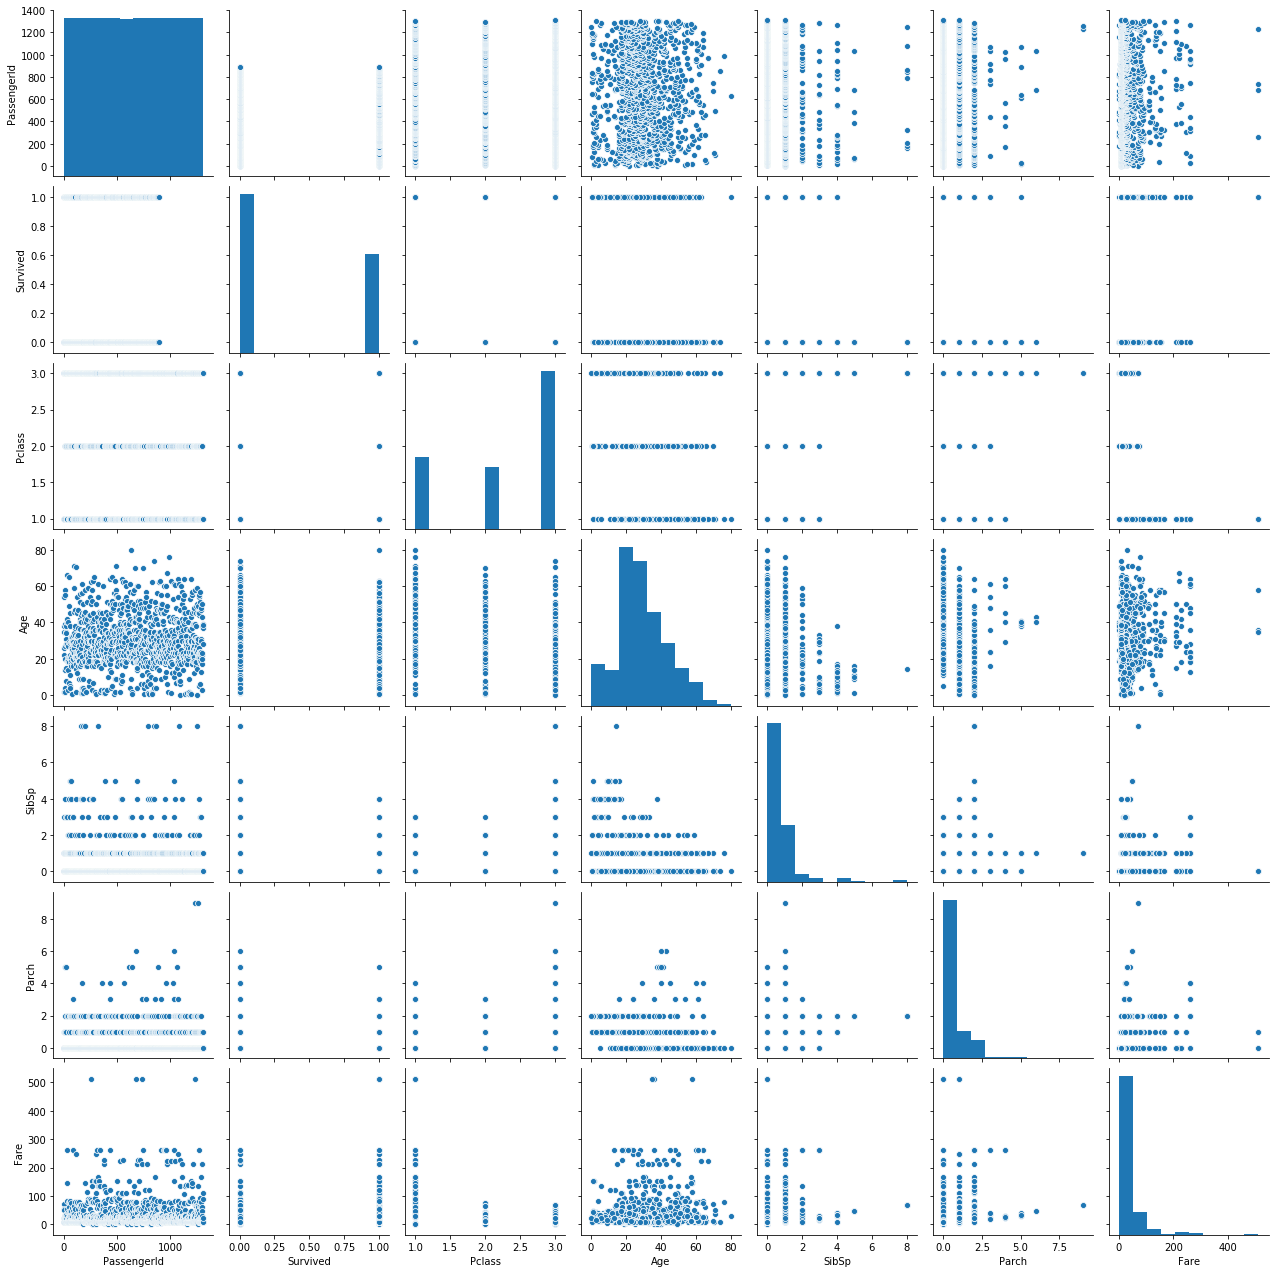

In [417]:
sns.pairplot(joined)

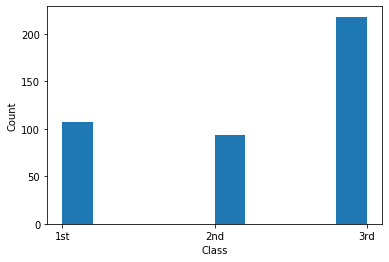

In [127]:
plt.hist(joined.Pclass)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([1.00,2.00,3.00], ['1st', '2nd', '3rd'])
plt.show()

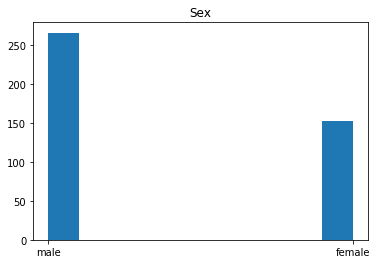

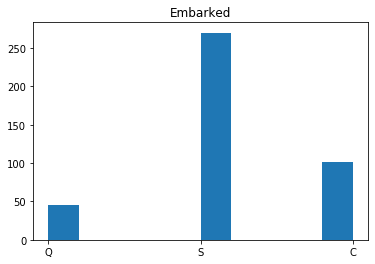

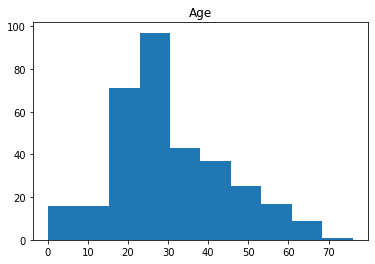

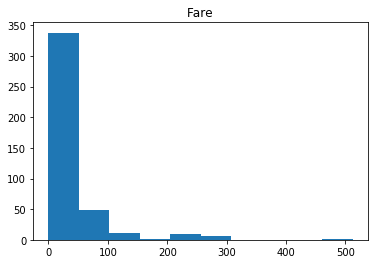

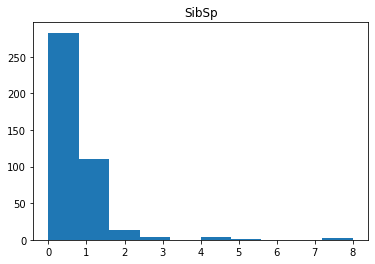

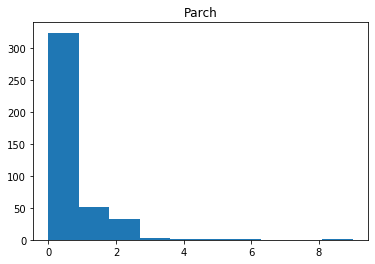

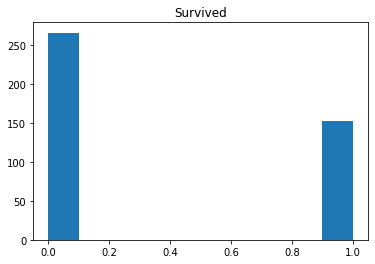

In [133]:
for col in ['Sex', 'Embarked', 'Age', 'Fare', 'SibSp', 'Parch', 'Survived']:
    plt.hist(joined[col])
    plt.title(col)
    plt.show()

In [139]:
corrMatrix =  joined.loc[:, ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
print (corrMatrix)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.108615 -0.000013  0.099943  0.159120  0.191514
Pclass   -0.108615  1.000000 -0.492143  0.001087  0.018721 -0.577147
Age      -0.000013 -0.492143  1.000000 -0.091587 -0.061249  0.337932
SibSp     0.099943  0.001087 -0.091587  1.000000  0.306895  0.171539
Parch     0.159120  0.018721 -0.061249  0.306895  1.000000  0.230046
Fare      0.191514 -0.577147  0.337932  0.171539  0.230046  1.000000


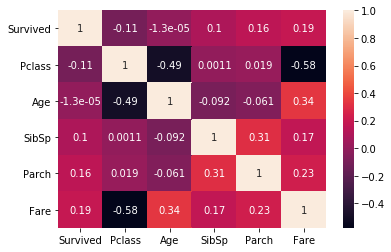

In [140]:
import seaborn as sn

sn.heatmap(corrMatrix, annot=True)
plt.show()

Notable negative correlation between age and class , and between fare and class. Slight positive correlations between fare and survival, age and fair, number of siblings and fare. 

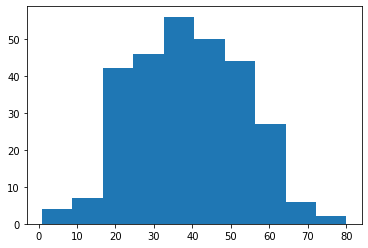

In [561]:
#distribution in each class? 
classOne = joined[joined['Pclass'] == 1]
classTwo = joined[joined['Pclass'] == 2]
classThree = joined[joined['Pclass'] == 3]
plt.hist(classOne.Age)
plt.show()

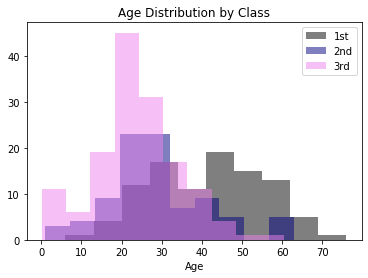

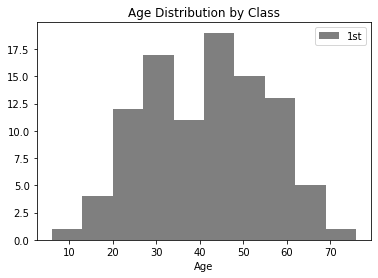

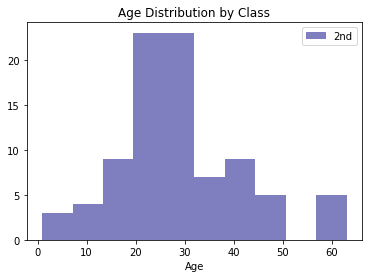

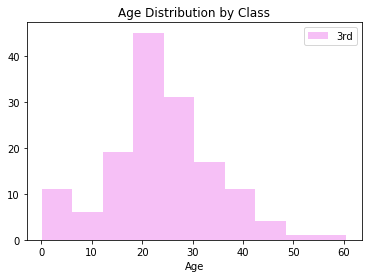

In [232]:
plt.hist(classOne.Age, alpha=0.5, label='1st', color = 'black')
plt.hist(classTwo.Age, alpha=0.5, label='2nd', color = 'navy')
plt.hist(classThree.Age, alpha=0.5, label='3rd', color = 'violet')
plt.xlabel('Age')
plt.legend(loc='upper right')
plt.title("Age Distribution by Class")
plt.show()

plt.hist(classOne.Age, alpha=0.5, label='1st', color = 'black')
plt.xlabel('Age')
plt.legend(loc='upper right')
plt.title("Age Distribution by Class")
plt.show()

plt.hist(classTwo.Age, alpha=0.5, label='2nd', color = 'navy')
plt.xlabel('Age')
plt.legend(loc='upper right')
plt.title("Age Distribution by Class")
plt.show()

plt.hist(classThree.Age, alpha=0.5, label='3rd', color = 'violet')
plt.xlabel('Age')
plt.legend(loc='upper right')
plt.title("Age Distribution by Class")
plt.show()



First class passengers have the most normal distribution, while second class and third class have a higher number of indiduals between ages 20 and 30. 

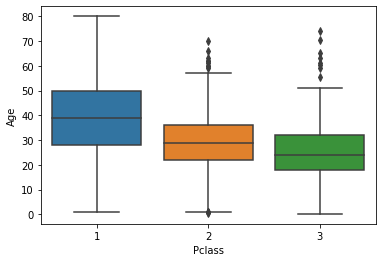

In [542]:
#Pclass & Age
sns.boxplot(x='Pclass',y='Age',data=joined)

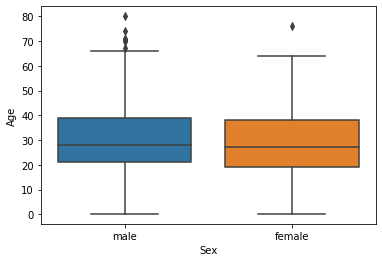

In [544]:
#Sex & Age
sns.boxplot(x='Sex',y='Age',data=joined)

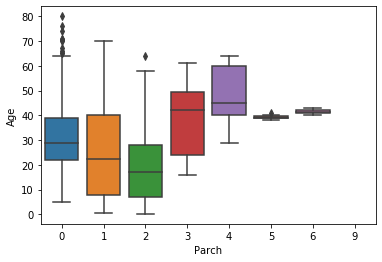

In [545]:
sns.boxplot(x='Parch',y='Age',data=joined)

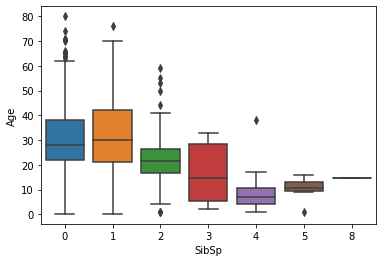

In [547]:
sns.boxplot(x='SibSp',y='Age',data=joined)

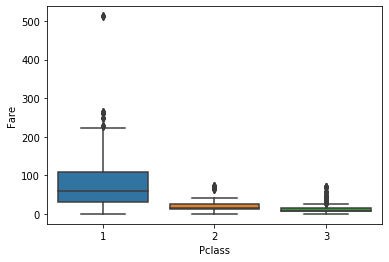

In [556]:
sns.boxplot(x='Pclass',y='Fare',data=joined)
#intereting that some first class tickets cost just as much as second and third class. 


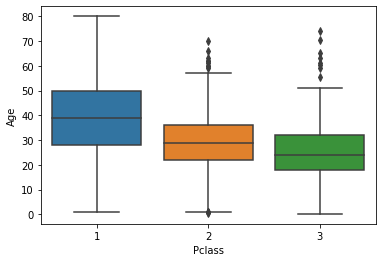

In [593]:
#class
sns.boxplot(x = 'Pclass', y = 'Age', data = joined)


In [ ]:
sns.boxplot(x='Sex',y='Fare',data=all)
sns.boxplot(x='Parch',y='Fare',data=all)
sns.boxplot(x='SibSp',y='Fare',data=all)
sns.boxplot(x='Embarked',y='Fare',data=all)

In [ ]:
all.isnull().sum()

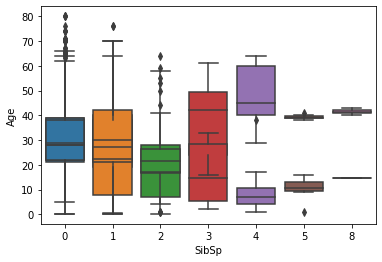

In [590]:
#Sex doesnt matter for predicting age
sns.boxplot(x='Sex',y='Age',data=joined)
#Parch matters
sns.boxplot(x = 'Parch', y = 'Age', data = joined)


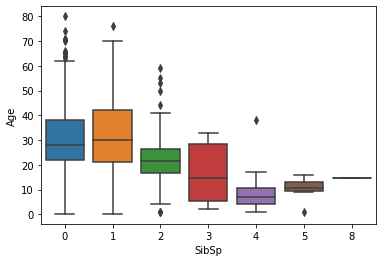

In [591]:
#SibSp matters
sns.boxplot(x = 'SibSp', y = 'Age', data = joined)


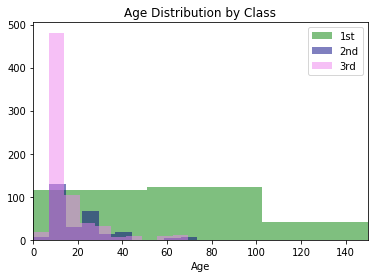

In [562]:
#We see that first class has a uniform distribution for all ages. When comparing to the histogram of ages, 
#it appears that most third class tickets are for children. Could parents be buying first class tickets and buying
#cheaper tickets for their children? Wouldn't they be in the same cabin? Seems weird. 
plt.hist(classOne.Fare, alpha=0.5, label='1st', color = 'green')
plt.hist(classTwo.Fare, alpha=0.5, label='2nd', color = 'navy')
plt.hist(classThree.Fare, alpha=0.5, label='3rd', color = 'violet')
plt.xlabel('Age')
plt.legend(loc='upper right')
plt.title("Age Distribution by Class")
plt.xlim((0,150))
plt.show()

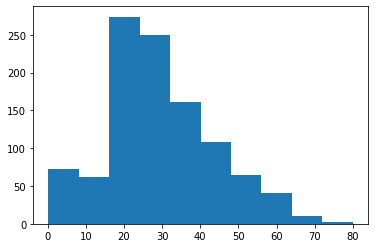

In [559]:
plt.hist(joined.Age)
plt.show()

In [276]:
classes = [1,2,3]
survivalOverall = round(sum(joined.Survived)/joined.shape[0],2)
survival = {'Overall': survivalOverall}
for  classNumber in classes:
    df = joined[joined['Pclass'] == classNumber]
    survival[classNumber] = round(sum(df.Survived)/df.shape[0],3)
survival

{'Overall': 0.36, 1: 0.467, 2: 0.323, 3: 0.33}

# Chi Squared Tests of Independence

Test of independence between categorical variables: chi squared

In [537]:
from scipy.stats import chi2
def chi_test(df,col1,col2):
    
    #Contingency Table
    contingency_table=pd.crosstab(df[col1],df[col2])
    #print('contingency_table :-\n',contingency_table)

    #Observed Values
    Observed_Values = contingency_table.values 
    #print("\nObserved Values :-\n",Observed_Values)

    #Expected Values
    import scipy.stats
    b=scipy.stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    #print("\nExpected Values :-\n",Expected_Values)

    #Degree of Freedom
    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    df=(no_of_rows-1)*(no_of_columns-1)
    #print("\nDegree of Freedom:-",df)

    #Significance Level 5%
    alpha=0.05
    #print('\nSignificance level: ',alpha)

    #chi-square statistic - χ2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    #print("\nchi-square statistic:-",chi_square_statistic)

    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=df)
    #print('\ncritical_value:',critical_value)

    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
    #print('\np-value:',p_value)

    #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
    if chi_square_statistic>=critical_value:
        print("\n chi_square_statistic & critical_value - significant result, reject null hypothesis (H0), dependent.")
    else:
        print("\n chi_square_statistic & critical_value - not significant result, fail to reject null hypothesis (H0).")

    if p_value<=alpha:
        print("\n p_value & alpha - significant result, reject null hypothesis (H0), dependent.")
    else:
        print("\n p_value & alpha - not significant result, fail to reject null hypothesis (H0), independent.")

In [539]:
chi_test(joined,'Sex','Pclass')


 chi_square_statistic & critical_value - significant result, reject null hypothesis (H0), dependent.

 p_value & alpha - significant result, reject null hypothesis (H0), dependent.


In [ ]:
#Sex & Parch
chi_test(joined,'Sex','Parch')

In [ ]:
chi_test(joined,'Sex','SibSp')

In [ ]:
#Sex & Embarked
chi_test(joined,'Sex','Embarked')

In [ ]:
#Pclass & SibSp
chi_test(joined,'Pclass','SibSp')

In [ ]:
#Pclass & Parch
chi_test(joined,'Pclass','Parch')

In [ ]:
chi_test(joined,'Pclass','Embarked')

In [ ]:
chi_test(joined,'SibSp','Parch')

In [ ]:
chi_test(joined,'SibSp','Embarked')

In [ ]:
chi_test(joined,'Parch','Embarked')

All the categorical variables seem to be dependent on each other

# PCA

In [419]:
joined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabinLetter',
       'cabinNumber', 'train/test'],
      dtype='object')

# Data Cleaning

In [825]:
import random

#missing embarked rows
index_NaN_embarked = list(joined[joined["Embarked"].isnull()]["Embarked"].index)
#Filling Embarked with random values of nonmissing data
joined['Embarked'][index_NaN_embarked] = joined['Embarked'][index_NaN_embarked].apply(lambda x: random.choice(joined['Embarked'].dropna()))

#Filling Fare with mean(Fare)
joined['Fare']=joined['Fare'].fillna(joined['Fare'].mean())

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [855]:
index_NaN_age = list(joined[joined["Age"].isnull()]["Age"].index)
# use  Class due to highest correlation
for i in index_NaN_age:
    print(i)
    x = random.choice(list(joined['Age'][joined['Pclass']==joined['Pclass'][i]]))
    joined['Age'][i]  = x
    print(x)
#joined.Age.isna().sum() #0

In [856]:
# Outlier detection 
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(joined[joined['train/test']=='train'],2,["Age","SibSp","Parch","Fare"])

In [857]:
joined = joined.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)



# Feature Engineering

In [860]:
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(joined.FareBand.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = onehotencoder.get_feature_names(['FareBand']) ) 
joined = pd.concat([joined, dfOneHot], axis=1)
#droping the country column 
joined= joined.drop(['FareBand'], axis=1) 

AttributeError: 'Categorical' object has no attribute 'reshape'

In [ ]:
#OneHotEncoder for multiple columns
# coder = OneHotEncoder()

# ohe_data = pd.DataFrame(
#     encoder.fit_transform(data[categorical_feats]).toarray(),
#     columns=encoder.get_feature_names(),
# )
# res = pd.concat([ohe_data, data], axis=1).drop(categorical_feats, axis=1)

In [785]:
joined['FareBand'] = pd.qcut(joined['Fare'],4)
joined.FareBand = labelencoder.fit_transform(joined['FareBand'])

In [869]:
joined['AgeBand'] = pd.qcut(joined['Age'],4)
joined.AgeBand = labelencoder.fit_transform(joined['AgeBand'])
joined.drop(['Age', 'Fare'], axis = 1, inplace = True)

In [878]:
split_one = joined['Name'].str.split('.', n=1, expand = True)
first= split_one[0]
last = split_one[1]
split_two = first.str.split(',', n=1, expand = True)
last = split_two[0]
joined['Title'] = split_two[1]
titles= joined['Title'].str.split('', n=1, expand = True)
joined = joined.replace(dict.fromkeys( [' Don', ' Rev', ' Dr', ' Mme',
        ' Major', ' Sir', ' Col', ' Capt',' Jonkheer'],'MaleTitle'))                    
joined= joined.replace(dict.fromkeys([ ' Ms', ' Lady', ' Mlle',' the Countess', ' Dona'], 'FemaleTitle'))
joined.drop(['Name'], axis = 1, inplace = True)

In [880]:
X = onehotencoder.fit_transform(joined.Title.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = onehotencoder.get_feature_names(['Title']) ) 
joined = pd.concat([joined, dfOneHot], axis=1)
#droping the country column 
joined= joined.drop(['Title'], axis=1) 
joined.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Ticket,Cabin,Embarked,train/test,Sex_female,FareBand,AgeBand,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0.0,3,1,0,A/5 21171,NaN,S,train,0.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1.0,1,1,0,PC 17599,C85,C,train,1.0,3,2,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1.0,3,0,0,STON/O2. 3101282,NaN,S,train,1.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1.0,1,1,0,113803,C123,S,train,1.0,3,2,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0.0,3,0,0,373450,NaN,S,train,0.0,1,2,0.0,0.0,1.0,0.0,0.0,0.0


In [887]:
joined['Family'] = joined['SibSp'] + joined['Parch'] + 1
joined['FamilyBand'] = pd.qcut(joined['Family'], len(joined.Family.dropna()),duplicates='drop')
#joined['FamilyBand'].value_counts()
joined['FamilyBand'] = labelencoder.fit_transform(joined['FamilyBand'])
joined.drop(['Family', 'SibSp', 'Parch'], axis = 1, inplace = True)

(0.999, 1.391]    790
(1.391, 2.0]      235
(2.21, 3.0]       158
(3.088, 4.0]       43
(4.055, 5.0]       22
(5.038, 6.0]       21
(6.022, 7.0]       16
(7.009, 8.0]        8
(8.009, 11.0]       4
(8.0, 8.009]        0
(7.0, 7.009]        0
(6.0, 6.022]        0
(5.0, 5.038]        0
(4.0, 4.055]        0
(3.0, 3.088]        0
(2.0, 2.21]         0
Name: FamilyBand, dtype: int64

In [893]:
#has three levels, one is base level so we have two new columns
joined = pd.get_dummies(joined, columns = ['Embarked'], prefix='Embarked_from_',drop_first=True)
joined.head()

,PassengerId,Survived,Pclass,Ticket,Cabin,train/test,Sex_female,FareBand,AgeBand,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,FamilyBand,Embarked_from__Q,Embarked_from__S
0,1,0.0,3,A/5 21171,NaN,train,0.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1
1,2,1.0,1,PC 17599,C85,train,1.0,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
2,3,1.0,3,STON/O2. 3101282,NaN,train,1.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1
3,4,1.0,1,113803,C123,train,1.0,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1
4,5,0.0,3,373450,NaN,train,0.0,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1


In [903]:
#decided not to use cabin due to so many missing values
def cabinFunc(x):
    stringX = str(x).strip()
    if (stringX == 'nan'):
        return [None,None]
    elif len(stringX) == 1:
        return [stringX[0], None]
    elif len(stringX) in [3,4]:
        return [stringX[0], stringX[1:]]
    else:
        return [stringX[0], stringX[1:3]]
        
#Call function to separate cabin letter and number
joined['cabinLetter'] = joined['Cabin'].apply(cabinFunc).apply(lambda x: x[0])
joined['cabinNumber'] = joined['Cabin'].apply(cabinFunc).apply(lambda x: x[1])
joined.drop(['cabinLetter', 'cabinNumber', 'Cabin'], axis = 1, inplace = True)joined.head()

,PassengerId,Survived,Pclass,Ticket,train/test,Sex_female,FareBand,AgeBand,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,FamilyBand,Embarked_from__Q,Embarked_from__S
0,1,0.0,3,A/5 21171,train,0.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1
1,2,1.0,1,PC 17599,train,1.0,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
2,3,1.0,3,STON/O2. 3101282,train,1.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1
3,4,1.0,1,113803,train,1.0,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1
4,5,0.0,3,373450,train,0.0,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1


In [918]:
joined['Ticket'].str.len().value_counts()

6     602
5     189
4     148
8     111
10     63
9      36
7      36
13     19
11     18
17     16
12     16
18     14
16     13
15     12
3       4
Name: Ticket, dtype: int64

In [921]:
joined['TicketBand'] = pd.qcut(rawr,5 ,duplicates='drop')
#joined['TicketBand'].value_counts()
joined['TicketBand'] = labelencoder.fit_transform(joined['TicketBand'])
joined.drop(['Ticket'], axis = 1, inplace = True)

In [708]:
#ticket is correlated with class 
joined.Ticket.groupby(joined.Pclass).value_counts()
#get number of numbers for ticket? -ignore for now

Pclass  Ticket          
1       PC 17608            7
        113781              6
        19950               6
        113503              5
        16966               5
                           ..
3       STON/O2. 3101282    1
        STON/O2. 3101283    1
        STON/O2. 3101290    1
        STON/OQ. 369943     1
        W./C. 6609          1
Name: Ticket, Length: 929, dtype: int64

In [922]:
joined.head()

,PassengerId,Survived,Pclass,train/test,Sex_female,FareBand,AgeBand,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,FamilyBand,Embarked_from__Q,Embarked_from__S,TicketBand
0,1,0.0,3,train,0.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,3
1,2,1.0,1,train,1.0,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,2
2,3,1.0,3,train,1.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,3
3,4,1.0,1,train,1.0,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1
4,5,0.0,3,train,0.0,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,1


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [931]:
joined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'train/test', 'Sex_female',
       'FareBand', 'AgeBand', 'Title_0', 'Title_1', 'Title_2', 'Title_3',
       'Title_4', 'Title_5', 'FamilyBand', 'Embarked_from__Q',
       'Embarked_from__S', 'TicketBand'],
      dtype='object')

In [527]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabinLetter']
# Separating out the features
x = trainCopy.loc[:, features].values
# Separating out the target
y = trainCopy.loc[:,['Survived']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [529]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
finalDf = pd.concat([principalDf, trainCopy[['Survived']]], axis = 1)

In [530]:
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Survived
0,-1.351247,0.087908,0.516959,-0.472294,-0.024423,-0.372965,0.137468,0
1,2.457551,-0.119250,-0.720600,-0.004164,-0.244122,-1.012263,-0.164634,1
2,-0.828390,0.117794,-1.588114,0.227435,0.254780,-0.324280,0.293752,1
3,2.213087,-0.077420,-0.838887,-0.156322,-0.458002,-1.010312,-0.371837,1
4,-1.130361,-0.853319,0.300215,0.263458,0.018738,0.120759,0.373480,0
...,...,...,...,...,...,...,...,...
886,-0.522568,-0.769062,0.290870,-0.369911,0.262918,0.157494,-0.617682,0
887,1.323442,-0.081079,-1.507582,-0.962675,-0.026488,-0.300061,-0.981483,1
888,-0.254825,1.989261,-0.766145,1.314041,-0.277560,0.759931,0.156866,0
889,1.303756,-1.040567,0.317202,-1.284332,-0.666315,0.169262,-0.692422,1


Interpreting principal components:

Loadings (values in each column) make up the principal components as a linear combination. 



In [534]:
pca.explained_variance_ratio_

array([0.30729748, 0.24811112, 0.12507721, 0.10702657, 0.08800185,
       0.07974381, 0.04474196])

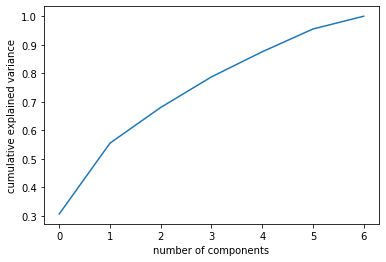

In [535]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [513]:
cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=2)
z = y

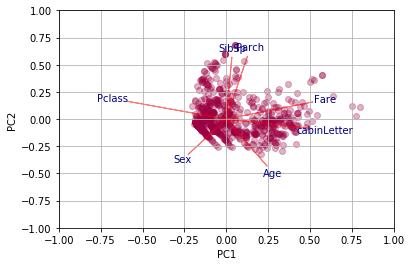

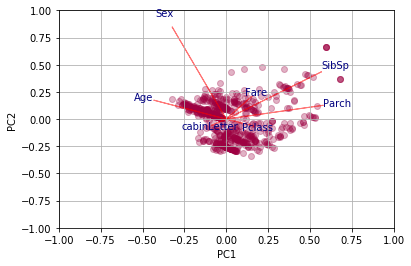

In [536]:
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# # In general, it's a good idea to scale the data prior to PCA.
# scaler = StandardScaler()
# scaler.fit(X)
# X=scaler.transform(X)    
# pca = PCA()
# x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = cmap(norm(z))[0,:], alpha = 0.3)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'b', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'navy', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]), features)
plt.show()
myplot(principalComponents[:,1:3],np.transpose(pca.components_[1:3, :]), features)
plt.show()

From the biplot above, we see siblings count is independent with class and cabin letter, but is slightly negatively related to sex and age. Fare seems to have a close relation with cabin letter as cabin sizes are probably allocated as sections. Gender is slightly related to one's class, as well as age. Based on the clustering of this biplot, we don't have distinct groups, so our results from k means or hierarchical clustering may not be ideal. Working with principal components with different models also may not be useful 

# Model Building

In [712]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [923]:
train_data,test_data=joined[joined['train/test']=='train'],joined[joined['train/test']=='test']
train_data.drop('train/test',axis=1,inplace=True)
test_data.drop('train/test',axis=1,inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [925]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(['PassengerId','Survived'],axis=1), 
                                                    train_data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [927]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

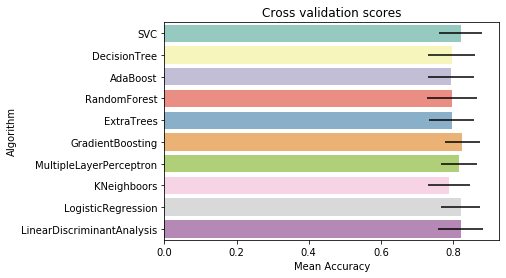

In [929]:
#Modeling step Test differents algorithms 
random_state = 101
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,
                                      learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy",cv = kfold,n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValErrors": cv_std,"Algorithm":["SVC","DecisionTree",
                                                                                      "AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression",
                                                                                "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [930]:
cv_res.sort_values('CrossValMeans',ascending=False)

,CrossValMeans,CrossValErrors,Algorithm
5,0.825859,0.047522,GradientBoosting
9,0.821126,0.062786,LinearDiscriminantAnalysis
0,0.821100,0.059888,SVC
8,0.821100,0.053333,LogisticRegression
6,0.816182,0.049411,MultipleLayerPerceptron
3,0.798149,0.069084,RandomForest
4,0.796616,0.062027,ExtraTrees
1,0.796510,0.065572,DecisionTree
2,0.794844,0.063738,AdaBoost
7,0.788604,0.057398,KNeighboors


In [716]:
###META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

#Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

#Best score
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 644 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   14.8s finished


ValueError: could not convert string to float: 'Perreault, Miss. Anne'

In [ ]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


##Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

#Best score
gsExtC.best_score_

In [ ]:
#RFC Parameters tunning 
RFC = RandomForestClassifier()


##Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

#Best score
gsRFC.best_score_

In [ ]:
#Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

#Best score
gsGBC.best_score_

In [ ]:
Hierarchical Clustering

In [ ]:
K Means

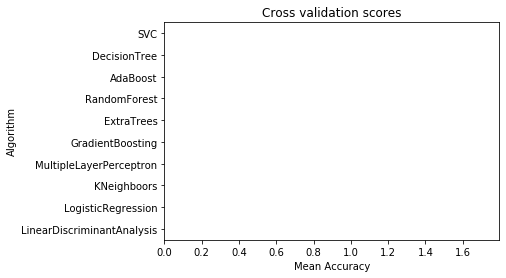

In [697]:
#Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)


Logistic Regression

In [ ]:
LDA

In [ ]:
QDA

In [ ]:
SVM

In [ ]:
#SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

#Best score
gsSVMC.best_score_

In [ ]:
Tree - Bagging (with booststrap)

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)